In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame

df_lending_data = pd.read_csv(
    Path("../Resources/lending_data.csv")
)
# Review the DataFrame

display(df_lending_data.shape)


display(df_lending_data.head())
display(df_lending_data.tail())


(77536, 8)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

y = df_lending_data['loan_status'] # Separate the y variable, the labels


x = df_lending_data.drop(columns='loan_status') # Separate the X variable, the features


In [4]:
# Review the y variable Series

display(y.head())
display(y.tail())


0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame

display(x.head())
display(x.tail())


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300
77535,15600.0,9.742,72300,0.585062,9,2,42300


In [6]:
# HMMM Let's see what the balance of the target values
y.value_counts()

# Nothing special!

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [7]:
# let's look at x.value

x.value_counts()

loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  derogatory_marks  total_debt
9600.0     7.211          48500            0.381443        4                0                 18500         78
           7.207          48400            0.380165        4                0                 18400         76
9200.0     7.018          46600            0.356223        3                0                 16600         75
9600.0     7.204          48400            0.380165        4                0                 18400         75
9400.0     7.102          47400            0.367089        3                0                 17400         73
                                                                                                            ..
16700.0    10.238         76900            0.609883        10               2                 46900          1
           10.236         76900            0.609883        10               2                 46900          1
       

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1) 

# Did we do it right? 
# lets look at the data

print("Shape of X_train:", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test: ", y_test.shape)


Shape of X_train: (58152, 7)
Shape of X_test:  (19384, 7)
Shape of y_train: (58152,)
Shape of y_test:  (19384,)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
#classifier = LogisticRegression(random_state=1)
classifier = LogisticRegression(solver='lbfgs', random_state=1, max_iter=1000000000000)


# Fit the model using training data
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000000000000, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data

regression_predictions = classifier.predict(X_test)
regression_results_df = pd.DataFrame({"Prediction": regression_predictions, "Actual": y_test})
regression_results_df



,Prediction,Actual
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
45639,0,0
11301,0,0
51614,0,0
4598,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Generate a confusion matrix for the model
# confusion_matrix(y_test, predictions)

regression_matrix = confusion_matrix(y_test, regression_predictions)
#regression_matrix


regression_matrix = confusion_matrix(y_test, regression_predictions)
regression_matrix_df = pd.DataFrame(regression_matrix, 
                                index = ['Actual Healthy Loans (LOW-risk)', 
                                'Actual Non-Healthy Loans (HIGH-risk)'],
                                    
                                columns = ['Predicted Healthy Loans (LOW-risk)', 
                                           'Predicted Non-Healthy Loans (HIGH-risk)'] )
regression_matrix_df



,Predicted Healthy Loans (LOW-risk),Predicted Non-Healthy Loans (HIGH-risk)
Actual Healthy Loans (LOW-risk),18658,107
Actual Non-Healthy Loans (HIGH-risk),37,582


In [12]:
# Let us reflect on how the balanced_accuracy score of the model changes any of the results

original_balanced_accuracy = balanced_accuracy_score(y_test, regression_predictions)

print("Balanced Accuracy Score:", original_balanced_accuracy)


Balanced Accuracy Score: 0.9672620331306306


In [13]:
# Print the classification report for the model


# Generate the classification report
original_classification_report = classification_report(y_test, regression_predictions, output_dict=True)

# Convert the report into a DataFrame for better readability
classification_report_df = pd.DataFrame(original_classification_report).transpose()

# Print the classification report
print("Original Data Classification Report:")

display(classification_report_df)


Original Data Classification Report:


,precision,recall,f1-score,support
0,0.998021,0.994298,0.996156,18765.000000
1,0.844702,0.940226,0.889908,619.000000
accuracy,0.992571,0.992571,0.992571,0.992571
macro avg,0.921362,0.967262,0.943032,19384.000000
weighted avg,0.993125,0.992571,0.992763,19384.000000


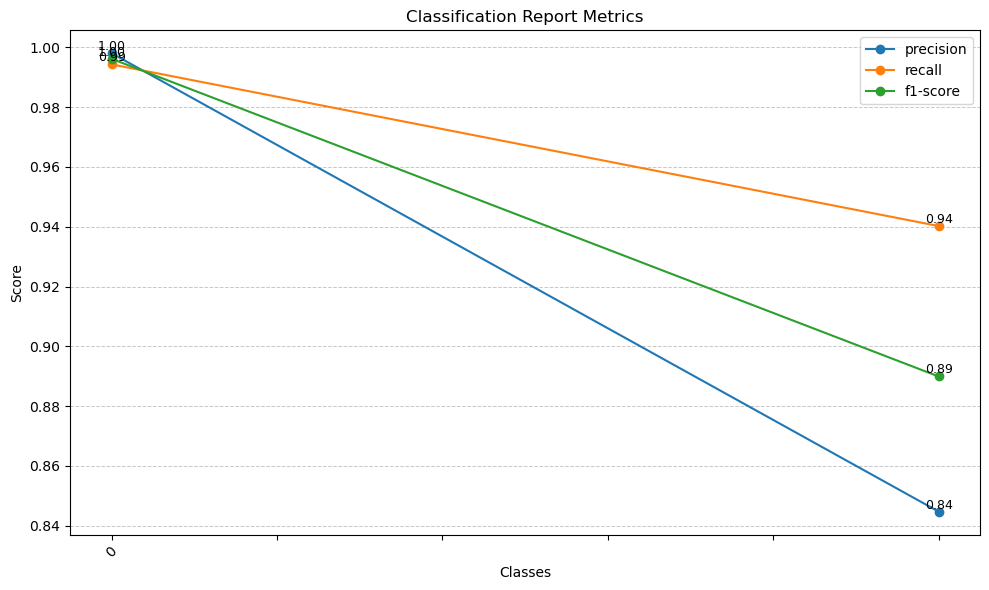

In [14]:
# Let's see if we have a better understanding using a graph. 
# more clear definitions 

import matplotlib.pyplot as plt

# Select the metrics to plot
metrics = ['precision', 'recall', 'f1-score']

# Plot the classification report metrics as a line chart
ax = classification_report_df[metrics].iloc[:-3].plot(kind='line', marker='o', figsize=(10, 6))

# Set plot title and labels
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Label each marker with its value
for metric in metrics:
    for i, value in enumerate(classification_report_df[metric].iloc[:-3]):
        plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

# Display the chart
plt.tight_layout()
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** 

The model demonstrates excellent performance in identifying healthy loans (0), achieving near-perfect precision and recall, resulting in a high F1 Score. For high-risk loans (1), the model maintains good precision (85%) and recall (94%), leading to a strong F1 Score. The overall accuracy is 99.26%, with a balanced accuracy of 94%.

This logistic regression model effectively identifies healthy and high-risk loans, showing high precision, recall, and F1 scores across both categories. However, despite the model's overall accuracy, the recall for high-risk loan applicants, while solid, is still lower than that for healthy loan applicants, indicating room for improvement in identifying all high-risk cases.

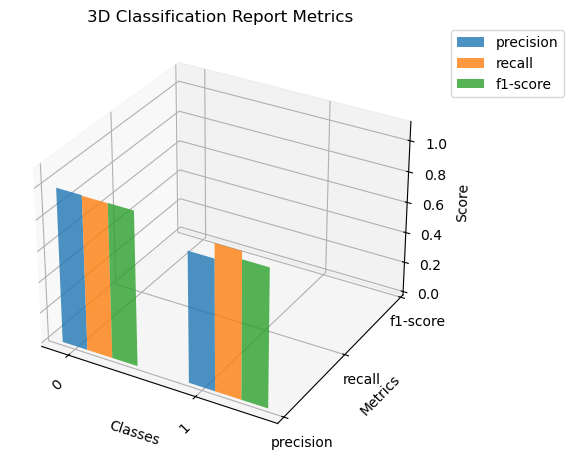

In [15]:
# Lets plot the data see if we have a better understanding using a 3D model ---------
# Select the metrics to plot
metrics = ['precision', 'recall', 'f1-score']

# Prepare data for 3D plotting
classes = classification_report_df.index[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
x = np.arange(len(classes))  # x positions for each class
y = np.arange(len(metrics))  # y positions for each metric

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Create bars for each metric for each class
for i, metric in enumerate(metrics):
    ax.bar(x + (i * 0.2), classification_report_df[metric].iloc[:-3], zdir='y', width=0.2, alpha=0.8, label=metric)

# Set axis labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('Metrics')
ax.set_zlabel('Score')
ax.set_title('3D Classification Report Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45)
ax.set_yticks(y)
ax.set_yticklabels(metrics)
ax.set_zlim(0, 1.1)

# Add legend
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Adjust the layout manually
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

# Display the plot
plt.show()

---